In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import networkx as nx

In [56]:
def make_arr_symmetric(arr):
    return np.tril(arr) + np.triu(arr.T, 1)

def normal_friends(size: int, popularity_mean = 0.5, popularity_std = 0.15):
    popularity_scores = np.random.normal(popularity_mean, popularity_std, size)
    popularity_scores = np.clip(popularity_scores, a_min=0, a_max=1)
    popularity_matrix = np.outer(popularity_scores, popularity_scores)

    rand_matrix = np.random.rand(size, size)
    friend_arr = (rand_matrix < popularity_matrix).astype(int)
    return friend_arr

def make_friends(size: int, normal = False):
    friend_arr = np.random.choice((0,1), size=(size, size))
    if normal:
        friend_arr = normal_friends(size = size)
    friend_arr = make_arr_symmetric(friend_arr)
    np.fill_diagonal(friend_arr, 0)
    return friend_arr


In [57]:
def create_friend_comparison(friend_arr):
    row_sums = np.sum(friend_arr, axis=1)  # Precompute row sums
    all_friend_sums = []

    for row_ind in range(friend_arr.shape[0]):
        # Find the indices of friends
        friend_indices = np.where(friend_arr[row_ind] == 1)[0]

        if len(friend_indices) > 0:
            # Use precomputed row sums for friends
            friend_sums = row_sums[friend_indices]
            avg_friends = np.mean(friend_sums)
        else:
            avg_friends = 0

        all_friend_sums.append(avg_friends)

    return np.vstack((row_sums, all_friend_sums)).T


def calculate_friend_means(friend_comparisons):
    person_mean, friend_mean = friend_comparisons.mean(axis=0)
    return person_mean, friend_mean

def plot_friend_distributions(friend_comparisons):
    # Extract the two arrays
    person_friends, friend_friends = friend_comparisons[:, 0], friend_comparisons[:, 1]

    # Set up the Seaborn style
    sns.set(style="whitegrid")

    # Plot the histograms
    plt.figure(figsize=(10, 6))
    sns.histplot(person_friends, color="blue", label="Person's Friends", stat="density", bins=10, alpha=0.6)
    sns.histplot(friend_friends, color="orange", label="Friend's Friends", stat="density", bins=10, alpha=0.6)

    # Add title and labels
    plt.title("Distribution of Friend Comparisons", fontsize=16)
    plt.xlabel("Number of Friends", fontsize=14)
    plt.ylabel("Density", fontsize=14)

    # Add legend
    plt.legend(fontsize=12)

    # Show the plot
    plt.show()



def analyse_friends(friend_arr):
    # let's look in a row wise manner to begin with
    # each row represents a person. The row sum is the number of friends that person has.
    # the sum of each column for the values in the row which are 1 represents the sum of friends for each person that the original person is friends with.
    # return an array which has a row for each person, with a column denoting their number of friends, and a column denoting the median number of friends of the original person's friends

    friend_comparisons = create_friend_comparison(friend_arr)
    person_mean, friend_mean = calculate_friend_means(friend_comparisons)
    print(f'person mean: {person_mean}')
    print(f'friend mean: {friend_mean}')

    # plot_friend_distributions(friend_comparisons)


In [65]:
friend_arr_uniform = make_friends(3000)
friend_arr_normal = make_friends(3000, normal=True)

In [68]:
print('uniform')
analyse_friends(friend_arr_uniform)
print('normal')
analyse_friends(friend_arr_normal)

uniform
person mean: 1499.8486666666668
friend mean: 1500.354581507376
normal
person mean: 755.1773333333333
friend mean: 824.3758263486782


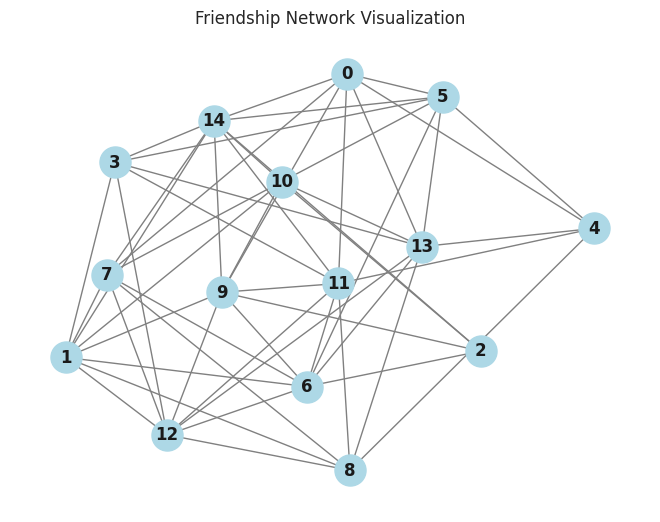

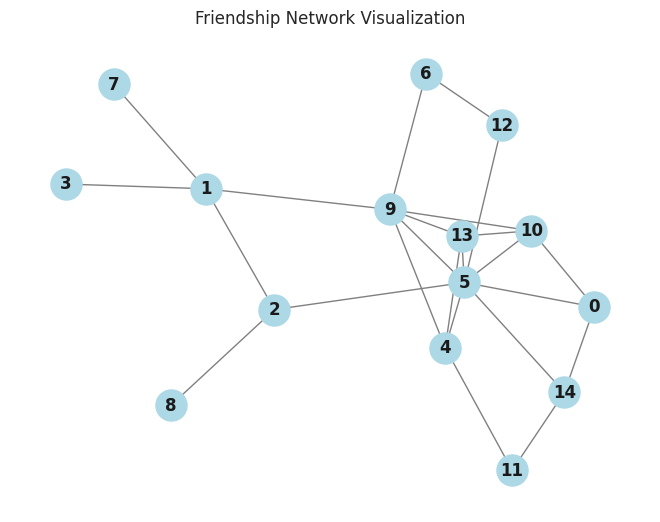

In [71]:

def visualize_friend_network(friend_arr):
    G = nx.from_numpy_array(friend_arr)
    nx.draw(G, with_labels=True, node_size=500, node_color='lightblue', font_size=12, font_weight='bold', edge_color='gray')
    plt.title("Friendship Network Visualization")
    plt.show()

visualize_friend_network(make_friends(15))
visualize_friend_network(make_friends(15, normal=True))

